# 🚢 Análise Exploratória de Dados — Titanic

## Contexto
Este projeto tem como objetivo realizar uma análise exploratória do dataset do Titanic,
buscando identificar padrões e fatores que influenciaram a sobrevivência dos passageiros.

Dataset clássico amplamente utilizado em estudos introdutórios de Ciência de Dados.

---
## Importação das bibliotecas

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

---
## Carregamento do dataset

In [10]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
## Visão geral dos dados

In [11]:
df.shape

(891, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---
## Identificação dos tipos de variáveis

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Tipos de Variáveis

**Variáveis Numéricas**:
  - Age (idade do passageiro)
  - Fare (tarifa paga)
  - SibSp (número de irmãos/cônjuges a bordo)
  - Parch (número de pais/filhos a bordo)
    
**Variáveis Categóricas**:
  - Sex (sexo do passageiro)
  - Embarked (porto de embarque)
  - Pclass (classe socioeconômica: 1ª, 2ª ou 3ª)

**Variáveis Textuais / Identificadores**:
  - Name (nome do passageiro)
  - Ticket (número do bilhete)
  - Cabin (identificação da cabine)

**Variável Alvo**:
  - Survived (indicador de sobrevivência: 0 = não sobreviveu, 1 = sobreviveu)

---
## Primeira análise do alvo (Survived)

In [15]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
df["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

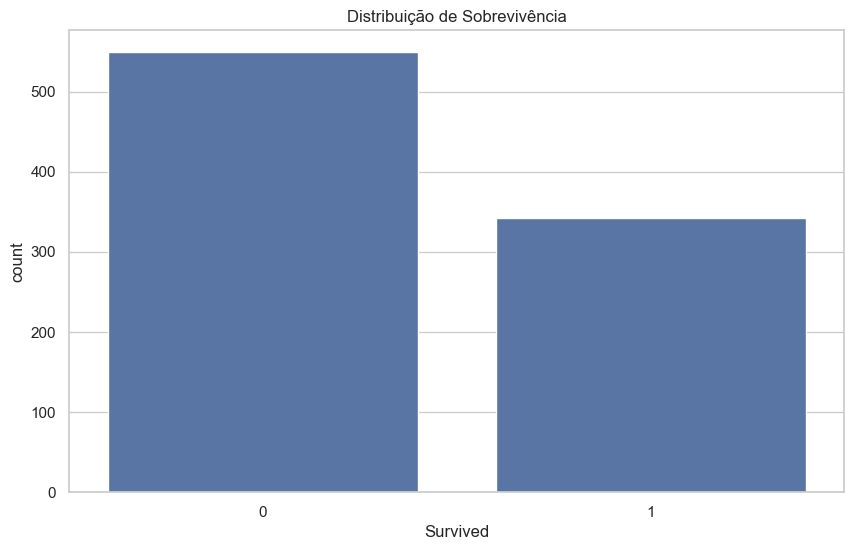

In [17]:
sns.countplot(x="Survived", data=df)
plt.title("Distribuição de Sobrevivência")
plt.show()

## Hipóteses Iniciais

Com base na estrutura original do dataset, algumas hipóteses iniciais podem ser levantadas:

1. Passageiros do sexo feminino apresentaram maior taxa de sobrevivência.
2. Passageiros da 1ª classe (`Pclass = 1`) tiveram maior probabilidade de sobrevivência do que os da 3ª classe.
3. Crianças e passageiros mais jovens tiveram maiores chances de sobreviver.
4. Tarifas mais altas (`Fare`) estão associadas a maior probabilidade de sobrevivência.
5. Passageiros com famílias muito grandes ou viajando sozinhos podem apresentar taxas de sobrevivência distintas.

As hipóteses são formuladas com base em conhecimento prévio sobre o evento e serão avaliadas ao longo da análise exploratória, não representando conclusões neste estágio.